# Basic Results Management

### Imports

In [1]:
import sys
import os
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2 import TauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
model = MichaelisMenten()


### Creating A Results Object

Create a Results object using model.run():

In [4]:
%time results = model.run(solver=TauHybridSolver(),number_of_trajectories=3)

CPU times: user 2.78 s, sys: 3.05 ms, total: 2.78 s
Wall time: 2.78 s


You can also create a Results object using Results.average_ensemble() and Results.stddev_ensemble() methods.

In [5]:
results_avg = results.average_ensemble()
results_stddev = results.stddev_ensemble()

### Accessing Data In A Results Object

Trajectory data is stored in Results.data, a list of Trajectory objects. Attributes of the first Trajectory can be accessed directly, but a warning will occur if there are more than one Trajectory objects in the list.

In [6]:
import warnings
print(results.solver_name)

TauHybridSolver


/home/fin/PycharmProjects/GillesPy2/gillespy2/core/results.py:133: UserWarning: Results is of type list. Use results[i]['model'] instead of results['model'] 
  warnings.warn("Results is of type list. Use results[i]['model'] instead of results['model'] ")


### Combining Results Objects

If two Results objects are created from equivalent models, their Trajectory lists can be combined using the + operator.

In [7]:
%time results2 = model.run(solver=TauHybridSolver(),number_of_trajectories=2)
results3 = results + results2
print("Number of trajectories in results3: ",len(results3.data))

CPU times: user 1.77 s, sys: 431 µs, total: 1.77 s
Wall time: 1.78 s
Number of trajectories in results3:  5


### Displaying Results

Results objects offer methods for displaying results and standard deviation range using matplotlib and plotplotly.

In [8]:
results3.plotplotly()

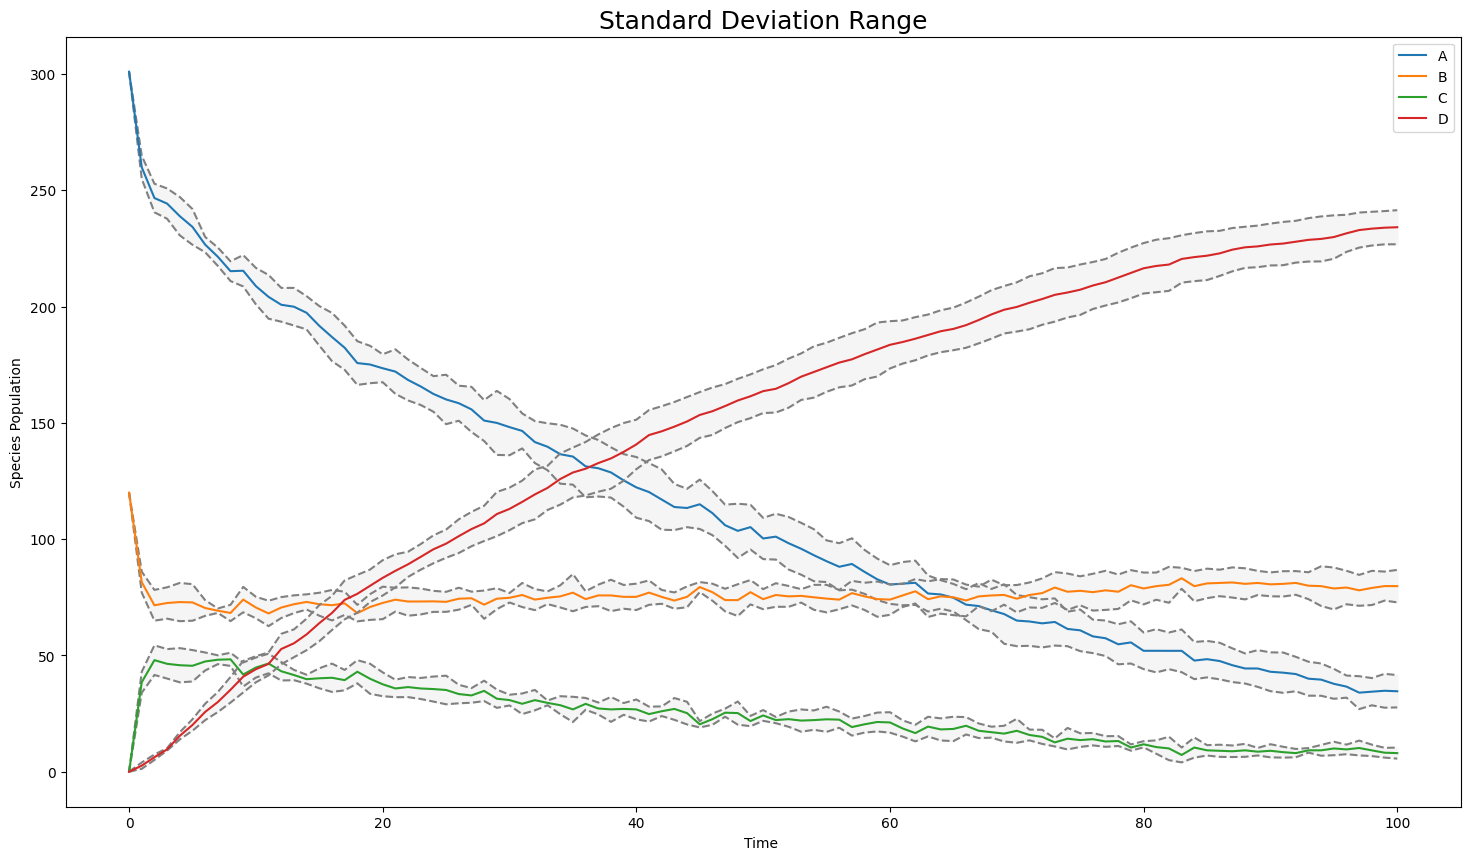

In [9]:
results3.plot_std_dev_range()

In [10]:
results.to_csv()